<a href="https://colab.research.google.com/github/netomap/Numbers_classification/blob/master/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from PIL import Image

In [2]:
print ('versão do tensor: {}'.format(tf.__version__))

versão do tensor: 2.2.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
#diretorio = 'C:/Users/manuel/Documents/GitHub/Numbers_classification/numbers'
diretorio = '/content/drive/My Drive/Colab Notebooks/Number_classifications/numbers2'
data_dir = pathlib.Path(diretorio)

lista = list(data_dir.glob('*/*.png'))
print ("Total de números: {}".format(len(lista)))

pastas = list(data_dir.glob('*'))
class_names = np.array([item.name for item in pastas if item.name != 'digitos.pde'])
print (class_names)

Total de números: 800
['6' '1' '2' '8' '7' '4' '5' '9' '3' '0']


In [5]:
image_generator = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, validation_split=0.1)

tamanho = (50, 50)

train_data = image_generator.flow_from_directory(
    directory = diretorio,
    target_size = tamanho,
    batch_size = 40,
    shuffle = True,
    classes = list(class_names),
    subset = 'training'
)

validation_data = image_generator.flow_from_directory(
    directory = diretorio,
    target_size = tamanho,
    shuffle = True,
    classes = list(class_names),
    subset = 'validation'
)

Found 724 images belonging to 10 classes.
Found 76 images belonging to 10 classes.


In [6]:
TRAIN_STEPS = train_data.n // train_data.batch_size
VALIDATION_STEPS = validation_data.n // validation_data.batch_size

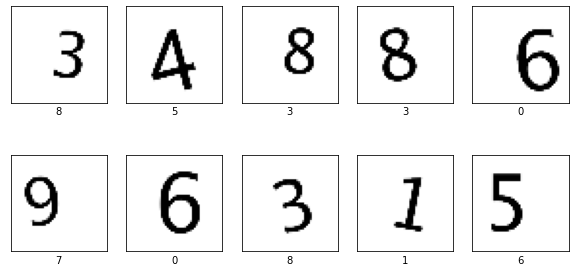

In [7]:
# desenhando algumas imagens do treino
plt.figure(figsize=(10,5))
images_batch, labels_batch = next(train_data)
for k in range(10):
    plt.subplot(2, 5, k+1)
    plt.imshow(images_batch[k])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(np.argmax(labels_batch[k]))
plt.show()

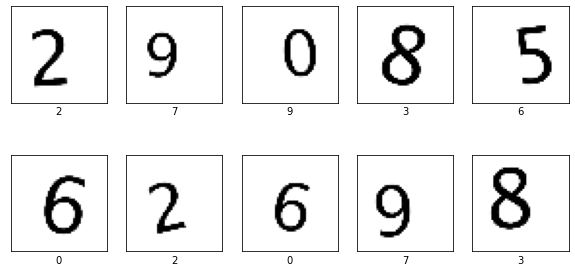

In [8]:
# desenhando algumas imagens da validação
plt.figure(figsize=(10,5))
images_batch, labels_batch = next(validation_data)
for k in range(10):
    plt.subplot(2, 5, k+1)
    plt.imshow(images_batch[k])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(np.argmax(labels_batch[k]))
plt.show()

In [9]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters = 64, kernel_size=7, activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=7))
model.add(keras.layers.Dropout(rate = 0.2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units = 128, activation='relu'))

model.add(keras.layers.Dense(units = 10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

parada_por_acuracia = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, verbose=1)

In [10]:
model.fit_generator(
    generator = train_data,
    epochs = 20,
    steps_per_epoch=TRAIN_STEPS,
    validation_data=validation_data,
    validation_steps = VALIDATION_STEPS,
    callbacks = [parada_por_acuracia],
    verbose=1
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
11/18 [=================>............] - ETA: 2:43 - loss: 2.3562 - accuracy: 0.1139

KeyboardInterrupt: ignored

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           multiple                  9472      
_________________________________________________________________
max_pooling2d_10 (MaxPooling multiple                  0         
_________________________________________________________________
dropout_10 (Dropout)         multiple                  0         
_________________________________________________________________
flatten_9 (Flatten)          multiple                  0         
_________________________________________________________________
dense_18 (Dense)             multiple                  295040    
_________________________________________________________________
dense_19 (Dense)             multiple                  1290      
Total params: 305,802
Trainable params: 305,802
Non-trainable params: 0
________________________________________________

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/Number_classifications/numbers_model.h5')

In [ ]:
diretorio = '/content/drive/My Drive/Colab Notebooks/Number_classifications/test_numbers'
data_dir = pathlib.Path(diretorio)
lista = list(data_dir.glob('*/*.png'))
print ('{} imagens'.format(len(test_images)))

test_images = []
contador = 0
for figura in lista:
  fig = Image.open(figura)
  fig = fig.resize(tamanho)
  test_images.append(np.reshape(fig.getdata(), (50, 50, 3)))
  fig.close()
  print (contador, end=', ')
  contador += 1

print('')

test_images = np.array(test_images)

test_images = test_images * (1./255) # normalizando as imagens entre 0 e 1

predicao = model.predict(test_images)

labels = []
for vetor in predicao:
  labels.append(np.argmax(vetor))

labels = np.array(labels)

plt.figure(figsize=(10, 5))
for k in range(10):
  n = random.randint(0, len(test_images)-1)
  plt.subplot(2, 5, k+1)
  plt.imshow(test_images[n])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(labels[n])
plt.show()